In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

warnings.filterwarnings("ignore") # ignoring for anonymity

In [2]:
from generate_corpora import corpus_from_json
from analysis import *

In [3]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)


# wilcox et al analyses are in other notebook
all_island_surprisals = pd.DataFrame(all_island_surprisals)
effects = pd.DataFrame(all_island_effects)

In [4]:
all_island_surprisals

,item,model,island,construction,wh,gap,surprisal
0,1,grnn,0,cleft,1,1,17.879575
1,1,grnn,0,cleft,-1,1,22.502473
2,1,grnn,0,cleft,1,-1,15.980307
3,1,grnn,0,cleft,-1,-1,13.432593
4,2,grnn,0,cleft,1,1,14.088758
...,...,...,...,...,...,...,...
110155,2186,gpt2,1,tough,-1,-1,19.425983
110156,2187,gpt2,1,tough,1,1,26.040264
110157,2187,gpt2,1,tough,-1,1,23.944355
110158,2187,gpt2,1,tough,1,-1,20.960012


In [5]:
grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")

In [6]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(grnn_cnp_island_effects + gpt2_cnp_island_effects + all_island_effects)

island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'GPT2 Filler Effects')

<Figure size 4000x2200 with 0 Axes>

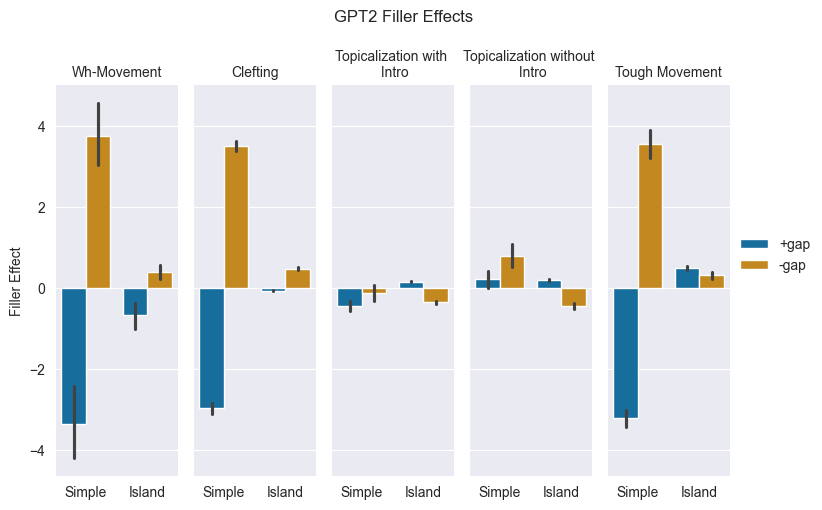

In [7]:
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GPT2 Filler Effects", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

Text(0.5, 1.05, 'Filler Effects in Pretrained RNN')

<Figure size 2400x1500 with 0 Axes>

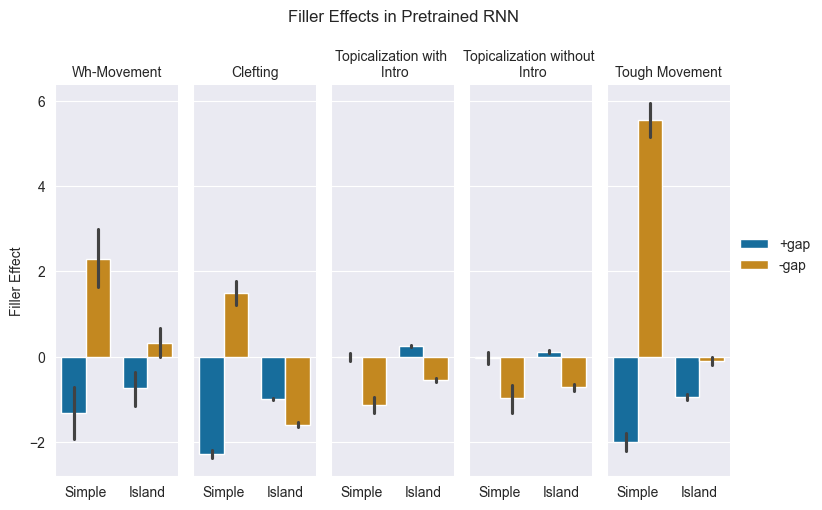

In [8]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("Filler Effects in Pretrained RNN", y = 1.05)
#plt.savefig("figures/grnn_expt1.png")

In [24]:
grnn.to_csv("data/pretrained_island_effects.csv", index=False)

## Testing for the Filler-Gap Interaction in Simple Sentences

In [9]:
def fit_regression_model(formula, lm_name, condition, surprisal_data):
    condition_data = surprisal_data[(surprisal_data['model'] == lm_name) & (surprisal_data['construction'] == condition)]
    model = Lmer(formula, data = condition_data)
    model.fit()
    return model.summary()

fg_formula = "surprisal ~ wh * gap + (1 | item)"
simple_surprisals = all_island_surprisals[all_island_surprisals['island'] == 0]
pd.DataFrame(interaction_effects(fg_formula, constructions, models, simple_surprisals, False))

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5271.291 	 AIC: 10554.582

Random effects:

                 Name     Var    Std
item      (Intercept)   4.067  2.017
Residual               10.445  3.232

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5271.291 	 AIC: 10554.582

Random effects:

                 Name     Var    Std
item      (Intercept)   4.067  2.017
Residual               10.445  3.232

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood:

,Estimate,P-val,Sig,model,condition,interaction_type
wh:gap,-0.947,0.000,***,grnn,cleft,filler_gap
wh:gap,0.280,0.000,***,grnn,intro_topic,filler_gap
wh:gap,0.234,0.059,.,grnn,nointro_topic,filler_gap
wh:gap,-1.887,0.000,***,grnn,tough,filler_gap
wh:gap,-1.622,0.000,***,gpt2,cleft,filler_gap
wh:gap,-0.083,0.073,.,gpt2,intro_topic,filler_gap
wh:gap,-0.147,0.048,*,gpt2,nointro_topic,filler_gap
wh:gap,-1.693,0.000,***,gpt2,tough,filler_gap


The results from WH-movement are in `comparison_wilcox.ipynb` (last row in the table in the section titled Basic Filler-Gap Licensing)

## Testing for Island Effects

We first examine the island effects using Wilcox et al's measures

In [13]:
# Wilcox et al code the features for FG interactions in simple and island conditions differently. 
all_island_surprisals['gap'] = all_island_surprisals['gap'].apply(recode_fg)
all_island_surprisals['wh'] = all_island_surprisals['wh'].apply(recode_fg)
island_formula = "surprisal~wh*gap*island+(1|item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals, True)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -52022.868 	 AIC: 104065.736

Random effects:

                 Name    Var    Std
item      (Intercept)  3.917  1.979
Residual               9.848  3.138

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -52022.868 	 AIC: 104065.736

Random effects:

                 Name    Var    Std
item      (Intercept)  3.917  1.979
Residual               9.848  3.138

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item':

In [14]:
pd.DataFrame(effects).reset_index()[['interaction_type', 'Estimate', 'P-val', 'model', 'condition']]

,interaction_type,Estimate,P-val,model,condition
0,filler_gap,-3.788,0.000,grnn,cleft
1,island_filler_gap,4.381,0.000,grnn,cleft
2,filler_gap,1.120,0.000,grnn,intro_topic
3,island_filler_gap,-0.325,0.281,grnn,intro_topic
4,filler_gap,0.936,0.063,grnn,nointro_topic
5,island_filler_gap,-0.099,0.852,grnn,nointro_topic
6,filler_gap,-7.547,0.000,grnn,tough
7,island_filler_gap,6.701,0.000,grnn,tough
8,filler_gap,-6.490,0.000,gpt2,cleft
9,island_filler_gap,5.952,0.000,gpt2,cleft


# Testing for FGE/UGEs

Following Kobzeva et al, we fit separate mixed-effects models based on whether a sentence contains a gap to test for FGEs and UGEs. However, we fit the models to the surprisals.

In [17]:
def code_island(value):
    if value == 1:
        return -0.5
    else:
        return 0.5
def code_filler(value):
    if value == 1:
        return 0.5
    else:
        return -0.5

In [18]:
all_island_surprisals['island'] = all_island_surprisals['island'].apply(code_island)
all_island_surprisals['filler'] = all_island_surprisals['wh'].apply(code_filler)

In [19]:
def per_gap_models(formula : str, conditions : List[str], models : List[str], data : pd.DataFrame, filler_effects : bool):
    coefs = []
    gap = [0, 1]
    if filler_effects:
        gap = ["-gap", "+gap"]
    for model in models:
        for condition in conditions:
            for is_gap in gap:
                gap_data = data[data['gap'] == is_gap]
                summary = fit_regression_model(formula, model, condition, gap_data)
                summary['model'] = model
                summary['construction'] = condition
                summary['gap'] = is_gap
                coefs.append(summary)
    return pd.concat(coefs)

In [26]:
formula = "surprisal ~ filler * island + (1 | item)"
gap_effects = per_gap_models(formula, constructions, models, all_island_surprisals, False)


0
110160
Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24763.888 	 AIC: 49539.775

Random effects:

                 Name     Var    Std
item      (Intercept)  17.417  4.173
Residual                2.922  1.709

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24763.888 	 AIC: 49539.775

Random effects:

                 Name     Var    Std
item      (Intercept)  17.417  4.173
Residual                2.922  1.709

No random effect correlations specified

Fixed effects:

1
110160
Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 972

In [28]:
gap_effects[gap_effects['model'] == 'grnn']

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig,model,construction,gap
(Intercept),22.464,22.319,22.608,0.074,6497.266,304.753,0.000,***,grnn,cleft,0
filler,-0.039,-0.152,0.075,0.058,5343.358,-0.669,0.503,,grnn,cleft,0
island,2.869,2.720,3.018,0.076,5734.052,37.653,0.000,***,grnn,cleft,0
filler:island,3.088,2.861,3.314,0.116,5343.358,26.712,0.000,***,grnn,cleft,0
(Intercept),16.220,16.135,16.305,0.043,6023.251,373.818,0.000,***,grnn,cleft,1
filler,-1.636,-1.695,-1.577,0.030,5344.815,-54.330,0.000,***,grnn,cleft,1
island,-1.456,-1.535,-1.378,0.040,5630.705,-36.521,0.000,***,grnn,cleft,1
filler:island,-1.293,-1.411,-1.175,0.060,5344.815,-21.469,0.000,***,grnn,cleft,1
(Intercept),21.744,21.601,21.888,0.073,5947.555,296.750,0.000,***,grnn,intro_topic,0
filler,-0.832,-0.930,-0.735,0.050,5343.414,-16.733,0.000,***,grnn,intro_topic,0


In [33]:
def format_for_latex(df):
    df['gap'] = df['gap'].apply(format_gap)
    df = df[["index", 'Estimate', "SE", 'T-stat', "gap"]]
    return df.to_latex(float_format="%.3f", index = False)


In [63]:
cleft_gap = gap_effects[(gap_effects['model'] == "grnn") & (gap_effects['construction'] == 'nointro_topic')].reset_index()
def format_for_latex(df):
    df['gap'] = df['gap'].apply(format_gap)
    df['T-stat'] = df['T-stat'].map(str) + df['Sig']
    df = df[["index", 'Estimate', "SE", 'T-stat']]
    return df.to_latex(float_format="%.3f", index = False)


format_for_latex(cleft_gap)

'\\begin{tabular}{lrrl}\n\\toprule\n        index &  Estimate &    SE &     T-stat \\\\\n\\midrule\n  (Intercept) &    21.855 & 0.129 & 170.019*** \\\\\n       filler &    -0.838 & 0.086 &  -9.741*** \\\\\n       island &     0.952 & 0.114 &   8.345*** \\\\\nfiller:island &    -0.256 & 0.172 &     -1.487 \\\\\n  (Intercept) &    17.170 & 0.077 & 223.556*** \\\\\n       filler &     0.048 & 0.040 &      1.197 \\\\\n       island &    -0.831 & 0.054 & -15.394*** \\\\\nfiller:island &    -0.157 & 0.081 &    -1.938. \\\\\n\\bottomrule\n\\end{tabular}\n'